<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/%E7%A8%8B%E5%BC%8F%E5%9F%BA%E6%9C%AC%E6%95%99%E5%AD%B8_1_%E8%82%A1%E7%A5%A8%E8%B2%B7%E8%B3%A3%E8%A8%88%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 取得股價資料

In [19]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

start_date = dt.datetime.now() - dt.timedelta(days=5*365)
end_date = dt.datetime.now()

tsm = yf.Ticker("^TWII")
tsm_data = tsm.history(start=start_date, end=end_date)[['Open','High','Low','Close','Volume']]
for i in tsm_data.columns:
  tsm_data[i] = pd.to_numeric(tsm_data[i])
tsm_data.dropna()
tsm_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-26 00:00:00+08:00,10827.980469,10890.690430,10827.980469,10836.700195,2295300
2018-02-27 00:00:00+08:00,10896.160156,10937.900391,10815.469727,10815.469727,2697700
2018-03-01 00:00:00+08:00,10779.099609,10805.549805,10709.690430,10785.790039,2508100
2018-03-02 00:00:00+08:00,10719.290039,10719.290039,10638.980469,10698.169922,2135500
2018-03-05 00:00:00+08:00,10727.450195,10756.370117,10642.900391,10642.900391,2203900
...,...,...,...,...,...
2023-02-17 00:00:00+08:00,15503.750000,15503.750000,15418.429688,15479.700195,2528300
2023-02-20 00:00:00+08:00,15452.009766,15575.320312,15436.660156,15551.230469,2994900
2023-02-21 00:00:00+08:00,15535.639648,15567.740234,15496.730469,15563.000000,2997300


# 看股價線圖

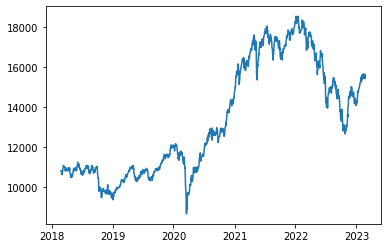

In [20]:
plt.plot(tsm_data.Close)

# 模擬進出場訊號

In [21]:
def add_label_column(df,lb,ub,n_day):
    shifted_close = df['Close'].shift(-n_day)
    is_decrease = shifted_close < df['Close'] * lb
    is_increase = shifted_close > df['Close'] * ub
    df['signal'] = pd.Series(0, index=df.index)
    df.loc[is_decrease, 'signal'] = -1
    df.loc[is_increase, 'signal'] = 1
    return df
df = add_label_column(tsm_data,0.97,1.03,7)
df

,Open,High,Low,Close,Volume,signal
Date,,,,,,
2018-02-26 00:00:00+08:00,10827.980469,10890.690430,10827.980469,10836.700195,2295300,0
2018-02-27 00:00:00+08:00,10896.160156,10937.900391,10815.469727,10815.469727,2697700,0
2018-03-01 00:00:00+08:00,10779.099609,10805.549805,10709.690430,10785.790039,2508100,0
2018-03-02 00:00:00+08:00,10719.290039,10719.290039,10638.980469,10698.169922,2135500,1
2018-03-05 00:00:00+08:00,10727.450195,10756.370117,10642.900391,10642.900391,2203900,1
...,...,...,...,...,...,...
2023-02-17 00:00:00+08:00,15503.750000,15503.750000,15418.429688,15479.700195,2528300,0
2023-02-20 00:00:00+08:00,15452.009766,15575.320312,15436.660156,15551.230469,2994900,0
2023-02-21 00:00:00+08:00,15535.639648,15567.740234,15496.730469,15563.000000,2997300,0


# 繪製進出場訊號

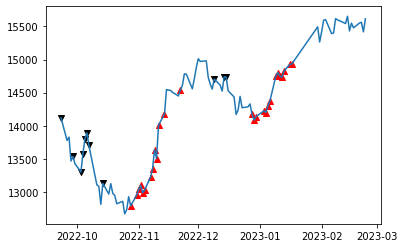

In [22]:
n = 100
temp_df = df.tail(n)
buy = temp_df[temp_df['signal']==1]['Close']
sell = temp_df[temp_df['signal']==-1]['Close']
plt.plot(temp_df['Close'])
plt.scatter(buy.index,buy.values,color='red',marker="^")
plt.scatter(sell.index,sell.values,color='black',marker="v")
plt.show()

# 模擬交易程序

In [25]:
account = 100000000
start_day = dt.datetime.now() - dt.timedelta(days=365*5)
end_day = dt.datetime.now()
share = 0
def Simulation_trading(df,account,start_day,end_day,share):
  total_asset = 0
  total_asset_history = []
  for i in df.loc[start_day:,:].index:
    action = df.loc[i,'signal']
    current_price = df.loc[i,'Close']
    #嘗試買入
    if action == 1:
      # 判斷是否有足夠金錢買入
      if account - current_price*1000 > 0:
        # 執行買入動作
        account -= current_price*1000
        share += 1
    #嘗試賣出
    elif action == -1:
      # 判斷是否有股份賣出
      if share > 0:
        # 執行賣出動作
        account += current_price*1000
        share -= 1
    else:
      #什麼也不做
      pass
    total_asset = account + share*current_price*1000
    total_asset_history.append(total_asset)
  return total_asset_history

# 必較單純持有跟有神一般策略的交易

<ipython-input-25-368a3a0f8a56>:8: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  for i in df.loc[start_day:,:].index:


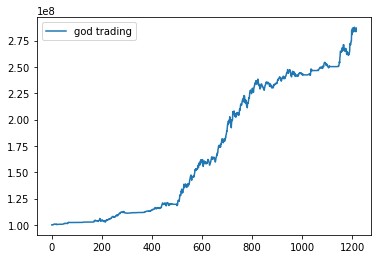

<ipython-input-26-a8dfe7a847aa>:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  plt.plot(df.loc[start_day:,'Close'].values,label='only hold')


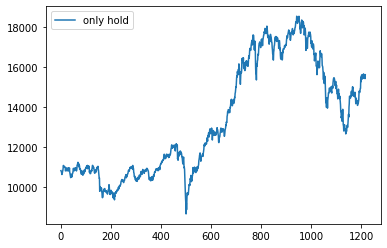

In [26]:
total_asset_history = Simulation_trading(df,account,start_day,end_day,share)
plt.plot(total_asset_history,label='god trading')
plt.legend()
plt.show()
plt.plot(df.loc[start_day:,'Close'].values,label='only hold')
plt.legend()
plt.show()